In [160]:
import warnings

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
import pandas as pd

import seaborn as sns

In [161]:
dataset=pd.read_csv(r"C:\Users\sanal\Desktop\idatalytics\WineQT.csv")

In [162]:
dataset.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [163]:
dataset.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [164]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [165]:
dataset=dataset.drop(['Id','density'],axis=1)

<Axes: xlabel='quality', ylabel='count'>

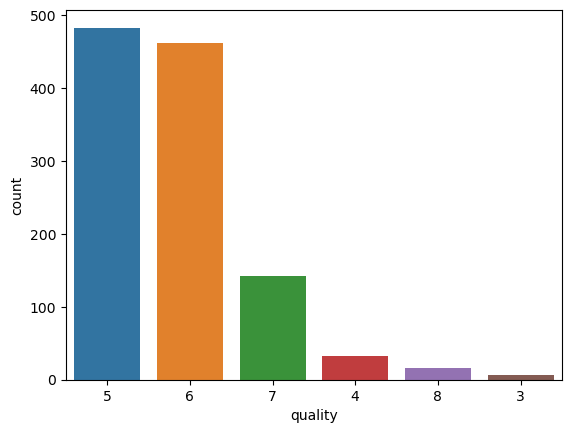

In [166]:
!pip install seaborn

import seaborn as sns

sns.countplot(x = 'quality', data=dataset, order = dataset['quality'].value_counts().index)

In [167]:
dataset.groupby('quality').size()

quality
3      6
4     33
5    483
6    462
7    143
8     16
dtype: int64

In [168]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
ds_3 = dataset[(dataset['quality']==3)] 
ds_4 = dataset[(dataset['quality']==4)] 
ds_5 = dataset[(dataset['quality']==5)]
ds_6 = dataset[(dataset['quality']==6)]
ds_7 = dataset[(dataset['quality']==7)]
ds_8 = dataset[(dataset['quality']==8)]
# upsample minority class
ds_3_upsample= resample(ds_3, 
                                 replace=True,    # sample with replacement
                                 n_samples= 483, # to match majority class
                                 random_state=42)  # reproducible results
ds_4_upsample = resample(ds_4, 
                                 replace=True,    # sample with replacement
                                 n_samples= 483, # to match majority class
                                 random_state=42)  # reproducible results
                           
ds_6_upsample = resample(ds_6, 
                                 replace=True,    # sample with replacement
                                 n_samples= 483, # to match majority class
                                 random_state=42)  # reproducible results
                          
ds_7_upsample = resample(ds_7, 
                                 replace=True,    # sample with replacement
                                 n_samples= 483, # to match majority class
                                 random_state=42)  # reproducible results
                           
ds_8_upsample = resample(ds_8, 
                                 replace=True,    # sample with replacement
                                 n_samples= 483, # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
ds= pd.concat([ds_3_upsample,ds_4_upsample,ds_6_upsample,ds_7_upsample,ds_8_upsample,ds_5])

In [169]:
ds.groupby('quality').size()

quality
3    483
4    483
5    483
6    483
7    483
8    483
dtype: int64

In [170]:
ds

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
1046,7.3,0.980,0.05,2.1,0.061,20.0,49.0,3.31,0.55,9.7,3
1055,7.1,0.875,0.05,5.7,0.082,3.0,14.0,3.40,0.52,10.2,3
922,7.6,1.580,0.00,2.1,0.137,5.0,9.0,3.50,0.40,10.9,3
1055,7.1,0.875,0.05,5.7,0.082,3.0,14.0,3.40,0.52,10.2,3
1055,7.1,0.875,0.05,5.7,0.082,3.0,14.0,3.40,0.52,10.2,3
...,...,...,...,...,...,...,...,...,...,...,...
1124,7.3,0.690,0.32,2.2,0.069,35.0,104.0,3.33,0.51,9.5,5
1131,6.1,0.715,0.10,2.6,0.053,13.0,27.0,3.57,0.50,11.9,5
1132,6.2,0.460,0.29,2.1,0.074,32.0,98.0,3.33,0.62,9.8,5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,3.45,0.58,10.5,5


<Axes: xlabel='quality', ylabel='count'>

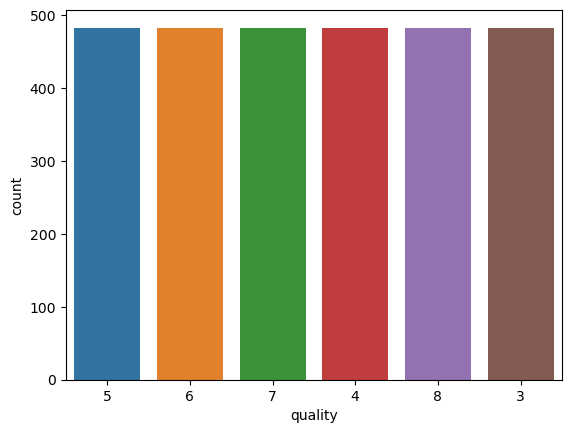

In [171]:
sns.countplot(x = 'quality', data=ds, order = dataset['quality'].value_counts().index)

In [172]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [174]:
x = ds.iloc[:,0:10].values
y = ds.iloc[:,10].values

In [ ]:
x


In [119]:
y

array([3, 3, 3, ..., 5, 5, 5], dtype=int64)

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [121]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

x_train:  (2028, 10)
y_train:  (2028,)
x_test:  (870, 10)
y_test:  (870,)


## logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression

In [123]:
model_lr = LogisticRegression(max_iter = 600)

In [127]:

from sklearn.metrics import accuracy_score, classification_report, silhouette_score

In [128]:
model_lr.fit(x_train, y_train)

C:\Users\sanal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=600)

In [129]:
y_pred_lr = model_lr.predict(x_test)

In [130]:
print("Accuracy : ", accuracy_score(y_test, y_pred_lr))

Accuracy :  0.5264367816091954


## K Nearest Neighbors Classifier

In [132]:
from sklearn.neighbors import KNeighborsClassifier

In [133]:
model_knn = KNeighborsClassifier()

In [134]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [135]:
y_pred_knn = model_knn.predict(x_test)

In [136]:
print("Accuracy : ", accuracy_score(y_test, y_pred_knn))

Accuracy :  0.7793103448275862


## Decision Tree Classifier

In [137]:
from sklearn.tree import DecisionTreeClassifier

In [138]:
model_dt = DecisionTreeClassifier()


In [142]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [143]:
y_pred_dt = model_dt.predict(x_test)

In [144]:
print("Accuracy : ", accuracy_score(y_test, y_pred_dt))

Accuracy :  0.8908045977011494


## Naive Bayes Classifier

In [145]:
from sklearn.naive_bayes import GaussianNB

In [146]:
model_nb = GaussianNB()

In [147]:
model_nb.fit(x_train,y_train)

GaussianNB()

In [148]:
y_pred_nb = model_nb.predict(x_test)

In [149]:
print("Accuracy : ", accuracy_score(y_test, y_pred_nb))

Accuracy :  0.5172413793103449


## svm

In [150]:
from sklearn.svm import SVC

In [151]:
model_svc = SVC(gamma='auto')

In [152]:
model_svc.fit(x_train,y_train)

SVC(gamma='auto')

In [153]:
y_pred_svc = model_nb.predict(x_test)

In [154]:
print("Accuracy : ", accuracy_score(y_test, y_pred_svc))

Accuracy :  0.5172413793103449


## prediction

In [157]:
Xnew = [[7.3,0.980,0.05,2.1,0.061,20.0,49.0,3.31,0.55,9.7]]

ynew = model_dt.predict(Xnew)

print(ynew)

[3]


In [158]:
y_test

array([8, 6, 7, 3, 5, 7, 6, 8, 5, 4, 5, 3, 7, 3, 4, 5, 8, 7, 5, 8, 7, 7,
       4, 5, 5, 3, 4, 4, 3, 3, 4, 3, 3, 5, 4, 6, 5, 7, 8, 5, 4, 3, 5, 7,
       6, 7, 7, 4, 8, 8, 7, 5, 3, 6, 8, 6, 5, 8, 7, 7, 7, 7, 6, 5, 8, 6,
       6, 7, 8, 3, 7, 5, 5, 6, 3, 7, 7, 3, 4, 8, 3, 7, 4, 3, 7, 8, 3, 4,
       5, 8, 6, 8, 3, 3, 6, 7, 6, 6, 8, 7, 4, 8, 6, 6, 4, 7, 4, 5, 3, 7,
       6, 7, 7, 5, 3, 4, 5, 3, 8, 8, 8, 4, 8, 6, 3, 4, 5, 7, 8, 8, 8, 5,
       5, 4, 8, 6, 6, 7, 8, 3, 8, 7, 7, 8, 4, 8, 6, 7, 4, 7, 4, 4, 7, 4,
       5, 4, 6, 8, 5, 6, 8, 4, 6, 5, 6, 8, 4, 6, 4, 8, 5, 6, 6, 6, 5, 3,
       3, 3, 8, 3, 5, 8, 5, 3, 5, 5, 7, 5, 6, 5, 7, 5, 8, 3, 4, 6, 6, 3,
       5, 8, 5, 7, 7, 6, 3, 5, 5, 3, 8, 8, 6, 8, 4, 6, 4, 5, 3, 6, 7, 4,
       4, 7, 5, 8, 8, 4, 5, 8, 3, 6, 3, 3, 6, 3, 6, 8, 3, 5, 3, 5, 3, 4,
       6, 5, 4, 5, 7, 8, 3, 6, 6, 7, 4, 3, 5, 6, 7, 7, 4, 4, 7, 7, 3, 3,
       6, 7, 3, 8, 6, 5, 4, 3, 5, 7, 5, 3, 3, 8, 8, 4, 5, 8, 8, 4, 4, 7,
       4, 5, 7, 3, 5, 4, 6, 3, 6, 3, 6, 7, 6, 6, 5,

In [159]:
y_pred_dt

array([8, 6, 6, 3, 5, 7, 6, 8, 5, 4, 5, 3, 7, 3, 4, 5, 8, 7, 5, 8, 7, 7,
       4, 4, 5, 3, 4, 4, 3, 3, 4, 3, 3, 5, 4, 5, 6, 7, 8, 4, 4, 3, 5, 7,
       6, 7, 7, 4, 8, 8, 7, 5, 3, 6, 8, 6, 5, 8, 7, 7, 7, 7, 6, 5, 8, 6,
       6, 7, 8, 3, 7, 5, 6, 6, 3, 7, 7, 3, 4, 8, 3, 7, 4, 3, 7, 8, 3, 4,
       6, 8, 6, 8, 3, 3, 6, 7, 6, 6, 8, 7, 4, 8, 7, 6, 4, 7, 4, 6, 3, 7,
       6, 6, 7, 5, 3, 4, 5, 3, 8, 8, 8, 4, 8, 6, 3, 4, 5, 7, 8, 8, 8, 5,
       5, 4, 8, 6, 6, 7, 8, 3, 8, 7, 7, 8, 4, 8, 6, 7, 4, 7, 4, 4, 7, 4,
       6, 4, 7, 8, 6, 6, 8, 4, 6, 6, 6, 8, 4, 6, 4, 8, 5, 6, 6, 6, 5, 3,
       3, 3, 8, 3, 6, 8, 5, 3, 4, 5, 7, 5, 6, 5, 7, 4, 8, 3, 4, 6, 6, 3,
       5, 8, 4, 7, 7, 7, 3, 6, 5, 3, 8, 8, 6, 8, 4, 6, 4, 5, 3, 6, 7, 4,
       4, 7, 5, 8, 8, 4, 5, 8, 3, 8, 3, 3, 5, 3, 7, 8, 3, 5, 3, 6, 3, 4,
       6, 5, 4, 6, 5, 8, 3, 5, 6, 8, 4, 3, 5, 6, 7, 7, 4, 4, 7, 8, 3, 3,
       6, 7, 3, 8, 6, 6, 4, 3, 5, 7, 5, 3, 3, 8, 8, 4, 5, 8, 8, 4, 4, 7,
       4, 5, 7, 3, 6, 4, 6, 3, 6, 3, 6, 7, 6, 5, 5,